Decision Trees 

0.7824324324324324
0.7767543859649122


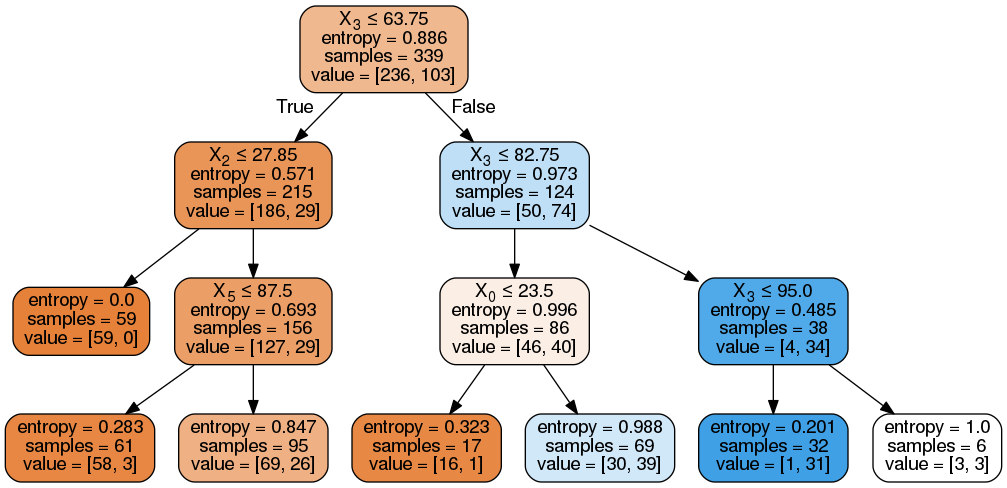

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

df = pd.read_csv('data/autoimmune.txt', delimiter="\t",header=None)
df=df.transpose()

df.columns=['Age','Blood_Pressure','BMI','Plasma_level','Autoimmune_Disease','Adverse_events','Drug_in_serum','Liver_function','Activity_test','Secondary_test']
df.index = np.arange(1, len(df) + 1)

X = df.drop('Autoimmune_Disease',axis=1)
y = df['Autoimmune_Disease']

dtree = DecisionTreeClassifier(criterion='entropy',random_state = 100,
 max_depth=3, min_samples_leaf=5)

kf = KFold(n_splits=10, shuffle=False, random_state=None)

acc=[]
for train_index, test_index in kf.split(X):
    X_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    X_test=X.iloc[test_index]
    y_true=y.iloc[test_index]
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_true, y_pred))

print (sum(acc)/len(acc))
    
scores = cross_val_score(dtree, X, y, cv=10)

print (sum(scores)/len(scores))

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())